# Introduction to SQL

A great place to start is this [introductory course in SQL](https://www.datacamp.com/courses/intro-to-sql-for-data-science).

For installation instructions on Linux see [here](https://dev.mysql.com/doc/refman/5.6/en/binary-installation.html), and on Mac see [here](https://dev.mysql.com/doc/refman/5.6/en/osx-installation.html).

## Python vs SQL (declarative languages)

In Python, consider how you'd approach the problem of simulating the making of a cake. At a high level, you'd need ingredients, and various methods: a method for combining them, baking them, and doing the final preparations. It might make most sense to present this as a class:

```python
class Cake:
    def __init__(self, *initial_data, **kwargs):
        """
        Cake is initialized with a dictionary of ingredients
        mapping ingredient names to quantities. Keyword args
        can also be used.
        """
        for dictionary in initial_data:
            for key in dictionary:
                setattr(self, key, dictionary[key])
        for key in kwargs:
            setattr(self, key, kwargs[key])
        self.batter = None
                    
    def combine_ingredients(self, f_extra_step=None):
        """
        The combine ingredients method specifies logic to 
        combine the set of anticipated ingredients.
        
        :param f_extra_step: optional function performing
                             extra, specific ingredient
                             combining logic
        :returns: mixed batter ready for baking
        """
        ...
```
We don't have to take this too far: the core idea is that in Python we'd have to specify each bit of logic relating to making the cake. Above we took an object-oriented approach, but in general Python supports multiple programming paradigms, including object-oriented, imperative, functional and procedural. 

SQL, by contrast, is a declarative programming language. The power of declarative programming is that it allows the user to define a task at a high-level, separately from the nuts-and-bolts of achieving the task, much as one might in real life. For instance, you might contact a baker and ask them to bake a cake for a friend's upcoming birthday. You'd detail the type of cake you want, and perhaps a extra details, and then you'd let the baker work their magic. 

This is exactly the approach of SQL, but with respect to data manipulation. You give SQL high-level specifications of the data manipulation take you wish to achieve, and a *database engine* behind the scenes works to split up your request into a number of tasks, optimise its approach, and execute on your request.

## Environment Setup

**There are many flavours of SQL**: SQL Server, Postgres, MySQL, with slight variation in syntax and functionality, but substantial overlap, and for the most part, trivial translation between them. We'll be working in MySQL here, but what you learn here will be broadly applicable to most other SQL implementations.

Download the `sample_ip.sql` and `sample_staff.sql` files using [this link](https://www.dropbox.com/sh/qlzk2hdr5zfdydy/AACn_O87ALIBA3rG_oXuYUBoa?dl=0%E2%80%8B). These two files comprise the data for two databases that we'll be working through.

Using MySQL, create the relevant databases and upload the downloaded files into the databases.

Create the databases:
```sql
mysql create database sample_ip
mysql create databse sample_staff
```

Load the databases:
```sql
mysql -u root sample_ip < sample_ip.sql
mysql -u root sample_staff < sample_staff.sql
```

Working on Linux, you can monitor the progress of the loading if you have a tool like pipe viewer (`apt-get install pv`) installed:
```sql
pv sample_ip.sql | mysql -u root -p sample_ip
pv sample_staff.sql | mysql -u root -p sample_staff
```



## Navigating command line SQL

If you're running SQL in the command line, at first you'll be dropped into an environment with no specific database connections. You can use the `show` command to display all possible database connections, and the `use` command to establish a connnection to a specific database.

**Side note:** You'll see that the below commands in SQL always end in a semicolon. This is the standard *delimiter* for SQL, and is used to denote the end of a query.

**Enter the MySQL command line:**
```bash
mysql -u root -p
```
This will enter the command MySQL command line as the `root` user, prompting for a password if you have set a password for your MySQL account.

**Show available database connections:**
```sql
show databases;
mysql> show databases;
+--------------------+
| Database           |
+--------------------+
| information_schema |
| mysql              |
| performance_schema |
| sample_ip          |
| sample_staff       |
| sys                |
+--------------------+
6 rows in set (0.02 sec)
```

**Connect to a specific database:**
```sql
use sample_staff;
```

**Show tables within the database to which you have connected:**
```sql
show tables;
mysql> show tables;
+-------------------------+
| Tables_in_sample_staff  |
+-------------------------+
| contract                |
| date                    |
| department              |
| department_employee_rel |
| department_manager_rel  |
| employee                |
| event_logger            |
| invoice                 |
| invoice_partitioned     |
| month                   |
| photo                   |
| salary                  |
| tinyint_asc             |
| title                   |
| user                    |
| user_login              |
| user_stat               |
+-------------------------+
17 rows in set (0.00 sec)
```

## Select Statements
Select statements are the bread-and-butter of data retrieval in SQL. At their core they retrive data fields from a table.

**Side note:*** Placeholders for variable names are denoted in angle braces `<>`.

**Selecting all**
```sql
SELECT *
FROM <table name>;
```
This statement returns all the entries from the given table. However, we seldom need to select all the entries from a table for viewing purposes; it is far more common to select all when joining information onto another table, or creating an intermediate view. We're often interested in selecting a subset of a table. Column-wise this is achieved by selecting a specific column or colection of columns from the dataframe.

**Selecting specific columns**
```sql
SELECT <column name 1>, <column name 2>
FROM <table name>;
```
The other type of subset we could select is a row-wise subset. This is typically achieved by a limit statement:
```sql
SELECT <column name 1>, <column name 2>
FROM <table name>
LIMIT 10;
```

**Exercise**: Select the `employee_id` field in the 10th to the 20th entries in the `department_employee_rel` table.

## Conditional Select Statements
When selecting data, we often only want to select data where certain conditions are met. SQL support the following comparison operators:

1. `=` Equal to
2. `>` Greater than
3. `<` Less than
4. `>=` Greater than or equal to
5. `<=` Less than or equal to
6. `<>` Not equal to

Conditional statements make use of the comparison operators in the context of a `WHERE` clause:
```sql
SELECT <column name>
FROM <table name>
WHERE <column name> <logical operator> <value>
```
The column in the `WHERE` clause does not have to match the column in the `SELECT` statement. For instance, in the `sample_staff` database:
```SQL
SELECT sign_date
FROM contract
WHERE employee_id <= 10010;
```
`WHERE` clauses can be enhanced via the use of SQL logical operators like `AND` and `OR`. Logical operators can define logic across multiple comparisons, like the following:
```SQL
SELECT sign_date
FROM contract
WHERE employee_id <= 10010 AND sign_date <= '1986-06-26';
```
Check out other logical operators like `ANY` and `BETWEEN`.

**Exercise:** Select the `employee_id` and `sign_date` values for which the following conditions hold:
1. `sign_date` is greater than the `sign_date` for `employee_id`s 10001 though 10010.
2. `employee_id` is greater than 50 000.
3. `insert_process_code` is not 'DUMMY'.

## Arithmetic Operators and Functions
Familiar arithmetic operators and functions can also be used in the context of select statements.

For instance, the `COUNT` function is often used in the context of a `SELECT` statement to return the number of rows within a table or group:
```sql
SELECT COUNT(*)
FROM <table name>;
```
It is often of interest to identify the number of unique values in a given column. This can be achieved by composing the `COUNT` and `DISTINCT` functions:
```sql
SELECT COUNT(DISTINCT(<column name>))
FROM <table name>;
```
More familiar arithmetic operators (`+`, `-`, `*`, `/`, `%`) can also be applied in the context of `SELECT` statements. For instance:
```sql
SELECT salary_amount * 10
FROM salary;
```

## Group By Clauses

Group by statements are a very useful pattern in `SQL`. They group rows of the table according to some logic, and apply aggregation functions to the selected fields.

For instance:
```sql
SELECT title, GROUP_CONCAT(employee_id)
FROM title
GROUP BY title;
```
This returns a dataframe with two columns. The first is the job title, and the second is the array of employee ids associated with a given job title.

The `GROUP BY` clause separated all data in the title table into groups with the same job title, then collected all the employee ids for these groups into an array per job title. 

**Important note:** the columns on which the dataframe is grouped may be selected without aggregation, however any column that is selected but not grouped on must be aggregated according to some function (like `GROUP_CONCAT`).

## Joins

Joins are a crucial component of SQL that determine how data are combined across tables. Joins always occur between two dataframes, and have two crucial components:
1. The left hand dataframe and the right hand dataframe.
2. The left hand index fields and the right hand index fields.

Different types of joins apply different logic to choose the final set of records in the joined dataframe:
1. `LEFT JOIN` keeps all records matching the index field values in the left hand side dataframe, joining those from the right hand side dataframe where they exist, else filling missing values with `Null`.
2. `INNER JOIN` keeps all records matching the index field values that are present in *both* the left hand side and right hand side dataframes. It doesn't create any new `Null` values.
3. `OUTER JOIN` keeps all records that match at least one of the index field values on either the left hand side or the right hand side dataframes, and filling any missing values with `Null`.

The following Venn diagrams are often helpful to remember the functionality of the different join types:

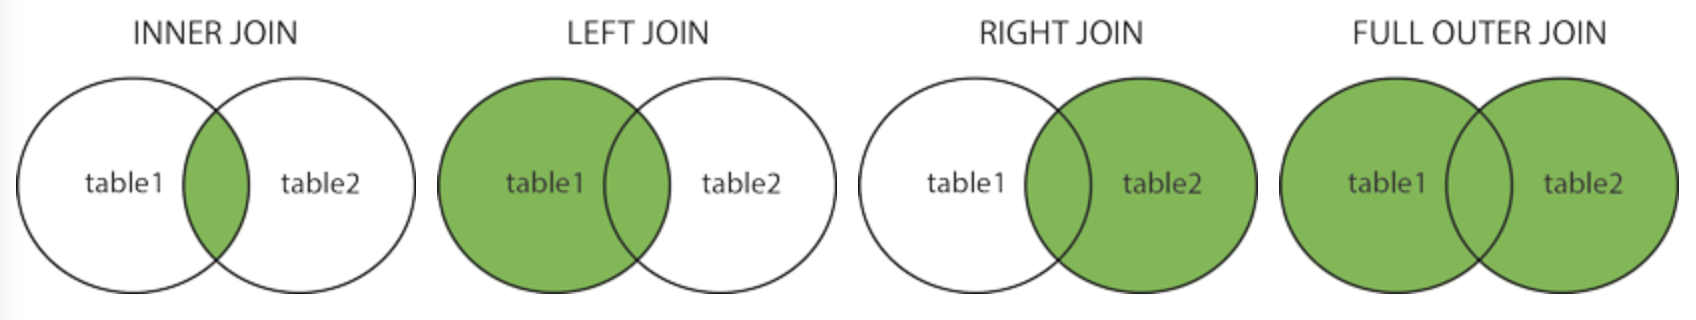

Lets go ahead with a JOIN of employee names onto their titles:
```sql
SELECT first_name, last_name, title
FROM employee
INNER JOIN title ON employee_id = employee_id
LIMIT 10;
```

## Coding Conventions

Now that we're getting into more complex SQL queries, it's time to start thinking about coding conventions to make sure our code is as accurate and readable as possible. Here are a few to start:

1. Reference the owner of an object: for tables, intead of just a table name, use `<datebase name>.<table name>`, and for columns use `<table name>.<column name>`.
2. Enclose column and table names in double quotes to avoid ambiguity and ensure correct interpretation.
3. Use aliases in subqueries, but use a consistent and descriptive naming convention.
4. Separate column names in longer `SELECT` statements or joins into separate, indented rows.

The key to point number two is that it avoids situation where a names column, for instance, intersects with a reserved keyword like `count` or `type` in SQL. It also permits the use of alternative characters like commas in column names.

**Important note** Backticks are used by default in `MySQL` to avoid collision with reserved keywords and allow special characters. However, they are not `ANSI-SQL` compliant and cannot therefore be used in, for example, SQL Server. However, we can enable the use of double quotes instead of backticks in SQL Server with the following:

```sql
SET GLOBAL sql_mode='ANSI';
SET SESSION sql_mode='ANSI';
```

**Exercise:** Clean up the following query to adhere to our best practice coding conventions:
```sql
select e.id AS employee_id, concat(e.first_name, ' ', e.last_name) AS employee_full_name, t.title AS employee_title from employee e inner join title t on e.id = t.employee_id limit 10;
```

## Subqueries

Subqueries in SQL are simply nested queries. They're often useful, and it's a great idea to get familiar with the syntax.

Here we'll use a subquery to find the department associated with a given employee, going via the `department_employee_rel` table, which specifies the mapping between employees and departments.

```sql
SELECT 
    department.name,
    department_rel.employee_id
FROM 
    department
    INNER JOIN
    (SELECT 
         department_employee_rel.employee_id,
         department_employee_rel.department_id
     FROM department_employee_rel
     WHERE department_employee_rel.employee_id = 10010) department_rel
     ON department.id = department_rel.department_id;
```

You should see something like the following output:

```sql
+-----------------+-------------+
| name            | employee_id |
+-----------------+-------------+
| Human Resources |       10010 |
| Production      |       10010 |
+-----------------+-------------+
2 rows in set (0.03 sec)
```


**Exercise:** Write a subquery to return all the `employee_id` for all employees who were active in more than one department historically. (Hint: you'll be working with the table `department_employee_rel`.

## Session Variables
These are defined and persist only within a given MySQL session.
```sql
SET @var4 = (SELECT COUNT(*) FROM "sample_staff"."employee");
SELECT @var4;
```


## Window Functions

A window function can be thought of as just another SQL function, except that its value is based on the value of other rows in addition to the values of the for which it is called, i.e. they function as a window into other rows.

```sql
set @num := 0, @dept_id := '';

select employee_id, department_id, from_date 
from (
   select employee_id, department_id, from_date,
      @num := if(@dept_id = department_id, @num + 1, 1) as row_number,
      @dept_id := department_id as dummy
  from department_employee_rel
  order by department_id, from_date
) as x where x.row_number <= 1;
```

[This blog post](https://www.xaprb.com/blog/2006/12/07/how-to-select-the-firstleastmax-row-per-group-in-sql/) contains an excellent discussion of window functions.

## Views
Views essentially store a query that provides a certain view into one or many tables in a database. They can be extremely useful for data exploration, and can be queried just like tables. 

Views, by default, are not stored separately from their underlying query, and querying a view results in running the query that generates the view from scratch each time. Look into indexed views to avoid this for performance purposes.

We'll create a dummy view for illustrative purposes:

```sql
CREATE OR REPLACE VIEW "sample_staff"."v_department7_rel" AS
    SELECT *
    FROM department_employee_rel 
    WHERE department_employee_rel.department_id = 7;
```

## Aggregation and Join Patterns

How would you approach the subquery exercise if you needed to return the relevant `employee_ids` as well as their associated `department_ids`? 

## Indices

Indices are ordered columns stored for a particular table, that allow the database engine to optimize queries including indexed columns. Assigning `primary key` will automatically create an index on this field, and other useful indices can be specified on frequently-queried columns. `id` is for instance a primary key in both the `employee` and `department` tables, whereas `department_id` and `employee_id` are both foreign keys in the `department_employee_rel` table.

```sql
SHOW INDEX FROM employee;
SHOW INDEX FROM department_employee_rel
```

```sql
SELECT	*	/*	Ignore index: 2-3 seconds */
FROM	"salary" IGNORE	INDEX	("ak_salary")
WHERE	1=1
	AND	"salary"."employee_id"	=	499998
;
SELECT	*	/* Use index: very fast	*/
FROM	"salary"	USE	INDEX	("ak_salary")
WHERE	1=1
	AND	"salary"."employee_id"	=	499998
;
```

The `EXPLAIN` command can be used before any query to get the database engine's execution plan for the given query (a window into possible optimizations).